In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import loompy
import anndata

sc.settings.verbosity = 3     
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
adata_children=sc.read_h5ad('/home/yike/phd/dengue/data/write/plots_children.h5ad')
adata_adults=sc.read_h5ad('/home/yike/phd/dengue/data/write/plots_adults.h5ad')
#adata = sc.read_loom('good.loom', X_name='spliced', obs_names='cellID', var_names='GeneName', dtype='float32',validate=False)
adata_children.obs_names_make_unique() 
adata_adults.obs_names_make_unique() 

scanpy==1.6.1 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.5.3 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1


In [2]:
#adata=adata[adata.obs['cell_quality']=='high']
#adata_children=adata[adata.obs['platform']=='10X']
#adata_adults=adata[adata.obs['platform']=='plate']

In [3]:
#results_children = 'write/plots_children.h5ad'
#results_adults = 'write/plots_adults.h5ad'

In [4]:
#sc.pp.log1p(adata_children)
#sc.pp.pca(adata_children)
#sc.pp.neighbors(adata_children)
#sc.tl.tsne(adata_children)
#sc.tl.leiden(adata_children)
#sc.pl.tsne(adata_children,color=['cell_type','Condition'],wspace=0.6)
#adata_children.write(results_children)
#adata_children

In [5]:
#sc.pp.log1p(adata_adults)
#sc.pp.pca(adata_adults)
#sc.pp.neighbors(adata_adults)
#sc.tl.tsne(adata_adults)
#sc.tl.leiden(adata_children)
#sc.pl.tsne(adata_adults,color=['cell_type','Condition'],wspace=0.6)
#adata_adults.write(results_adults)
#adata_adults

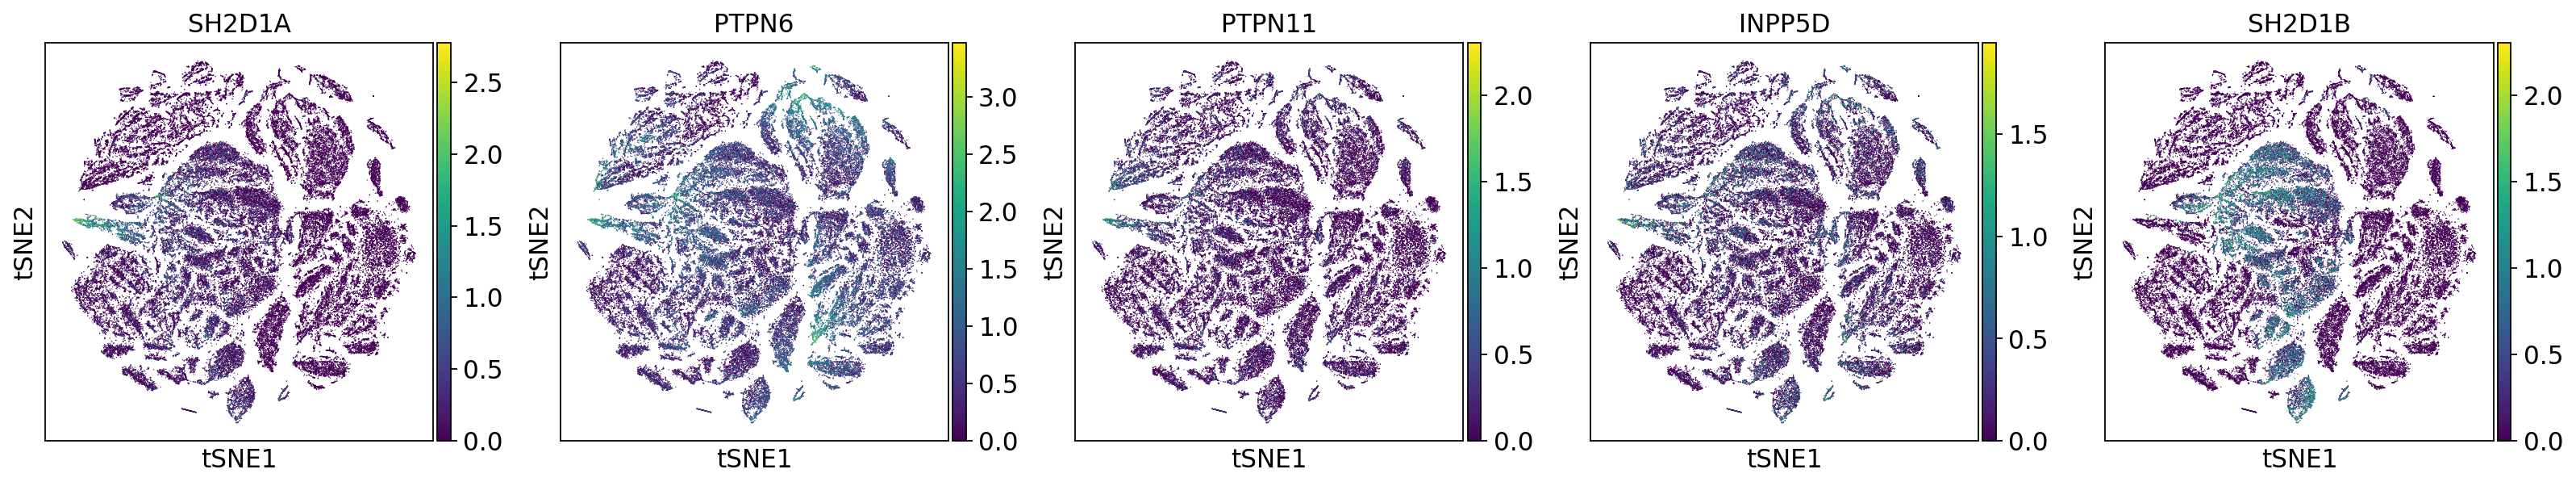

In [12]:
# SH2D1A, SHP1/PTPN6, SHP/PTPN11, SHIP1/INPP5D, EAT2/SH2D1B

sc.pl.tsne(adata_children,color=['SH2D1A','PTPN6', 'PTPN11', 'INPP5D', 'SH2D1B'], ncols=5)

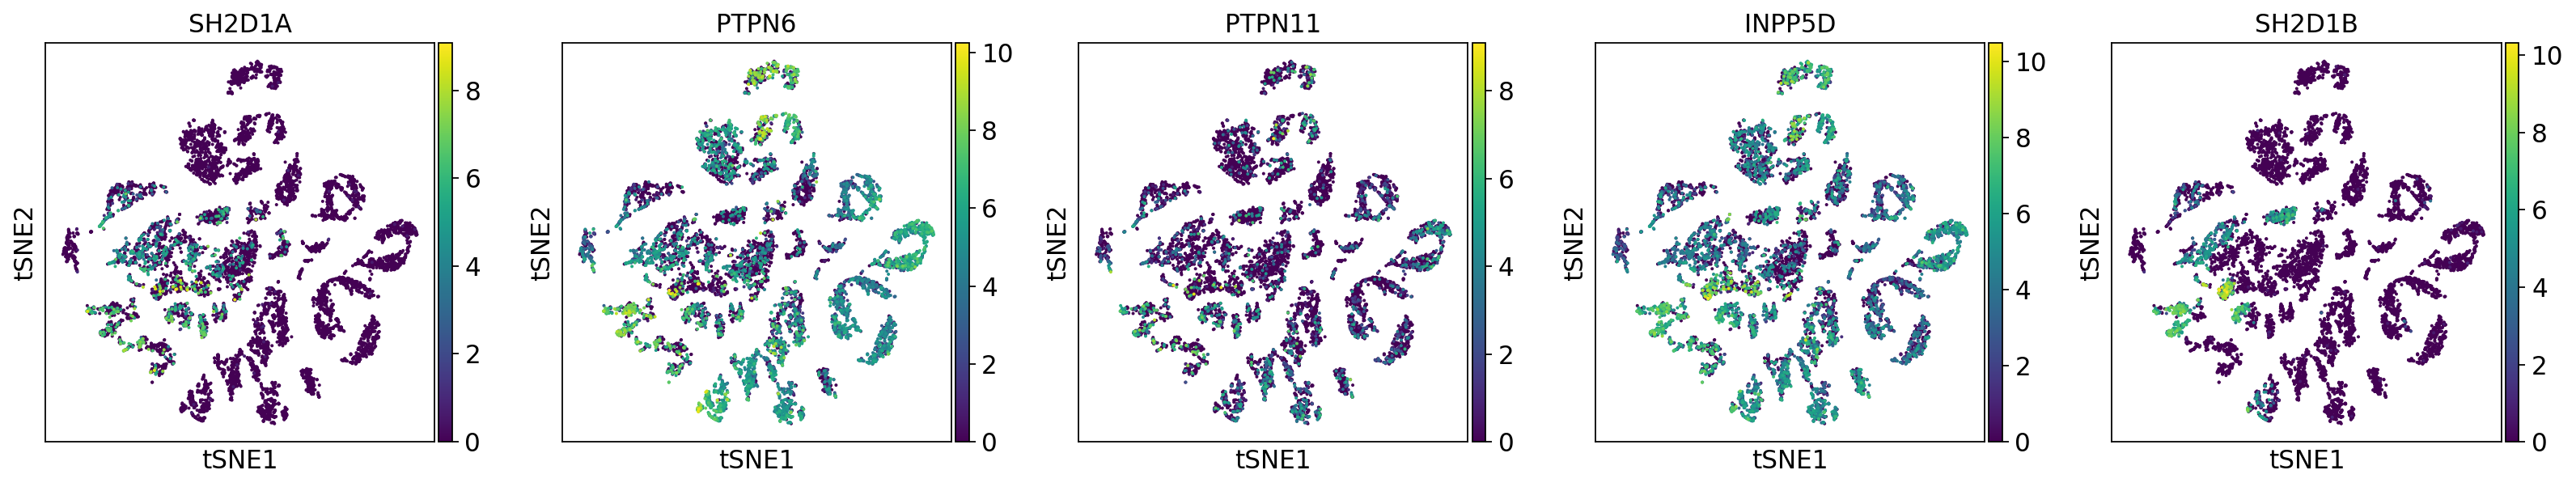

In [13]:
sc.pl.tsne(adata_adults,color=['SH2D1A','PTPN6', 'PTPN11', 'INPP5D', 'SH2D1B'], ncols=5)

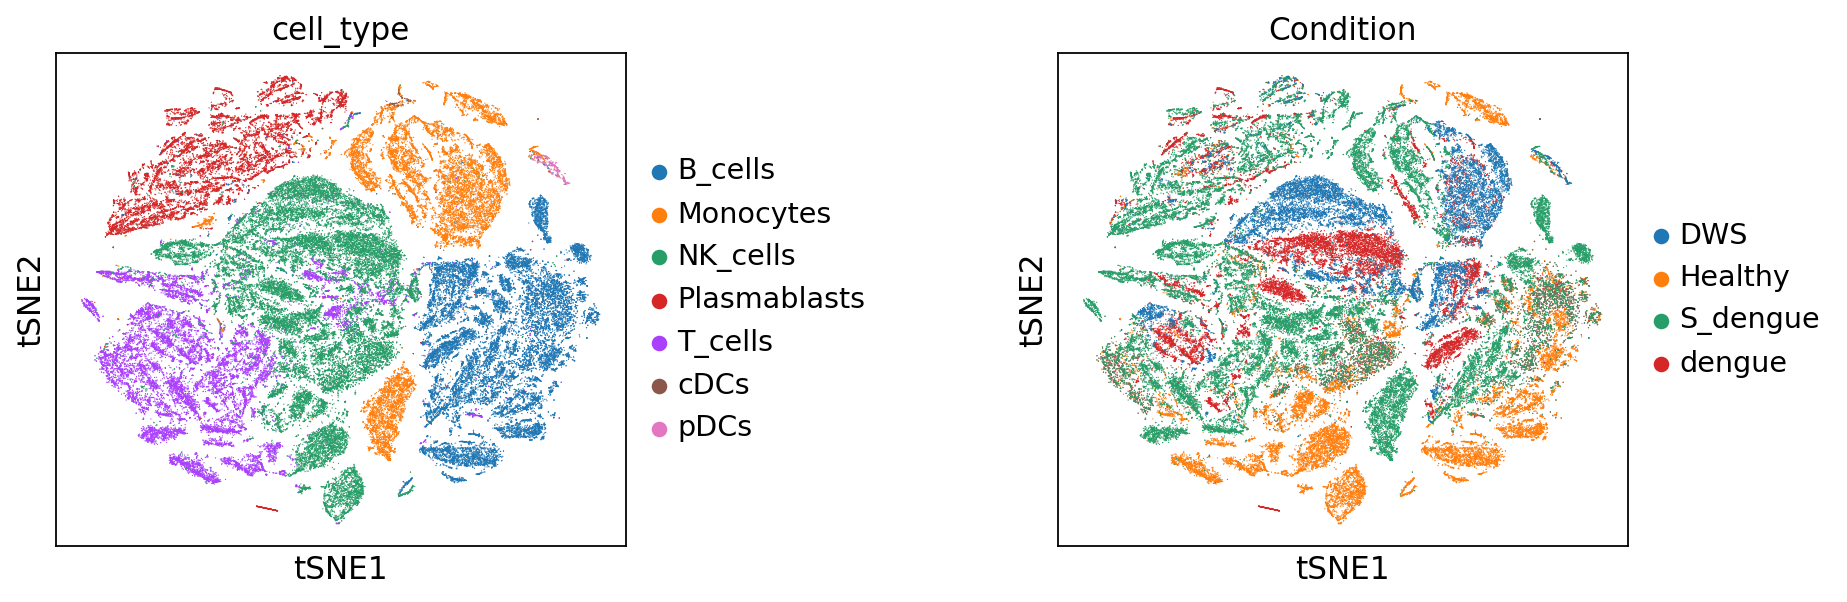

In [6]:
sc.pl.tsne(adata_children,color=['cell_type','Condition'],wspace=0.6)

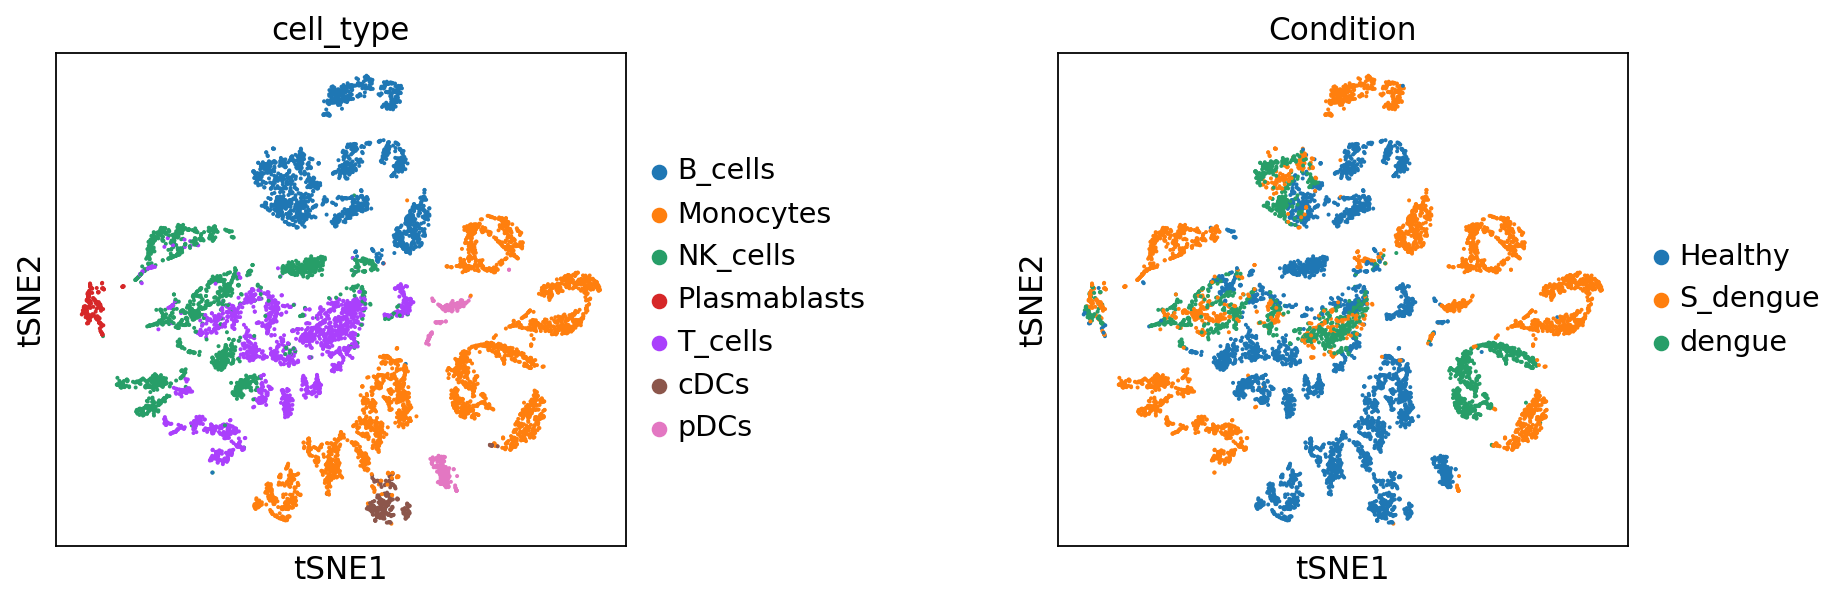

In [7]:
sc.pl.tsne(adata_adults,color=['cell_type','Condition'],wspace=0.6)

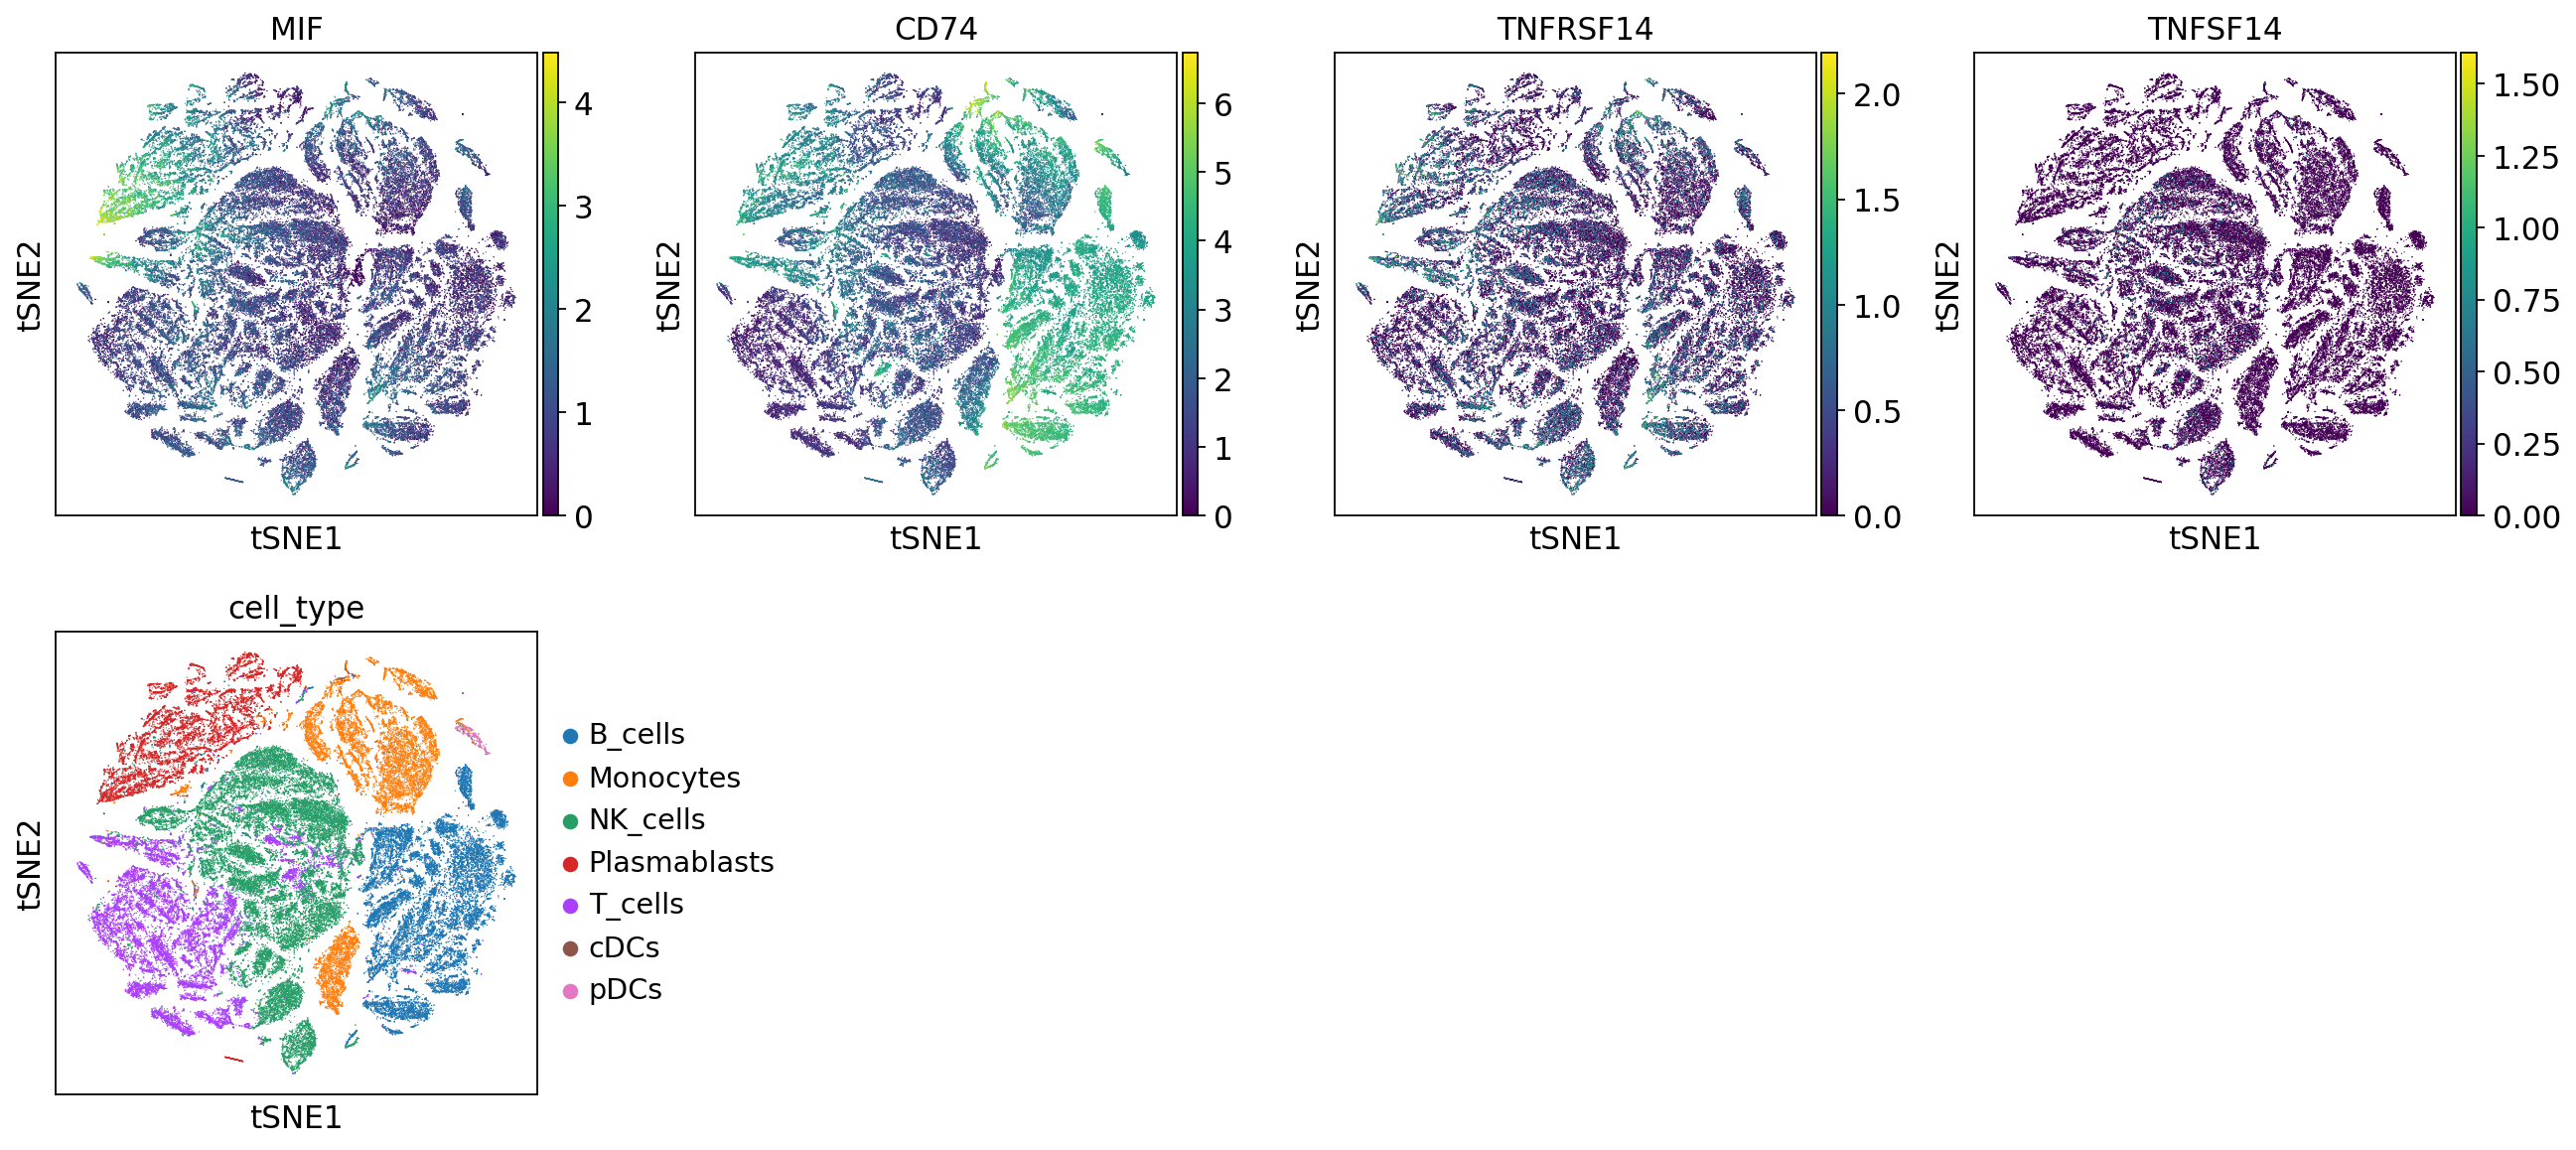

In [8]:
sc.pl.tsne(adata_children,color=['MIF','CD74','TNFRSF14','TNFSF14','cell_type'])

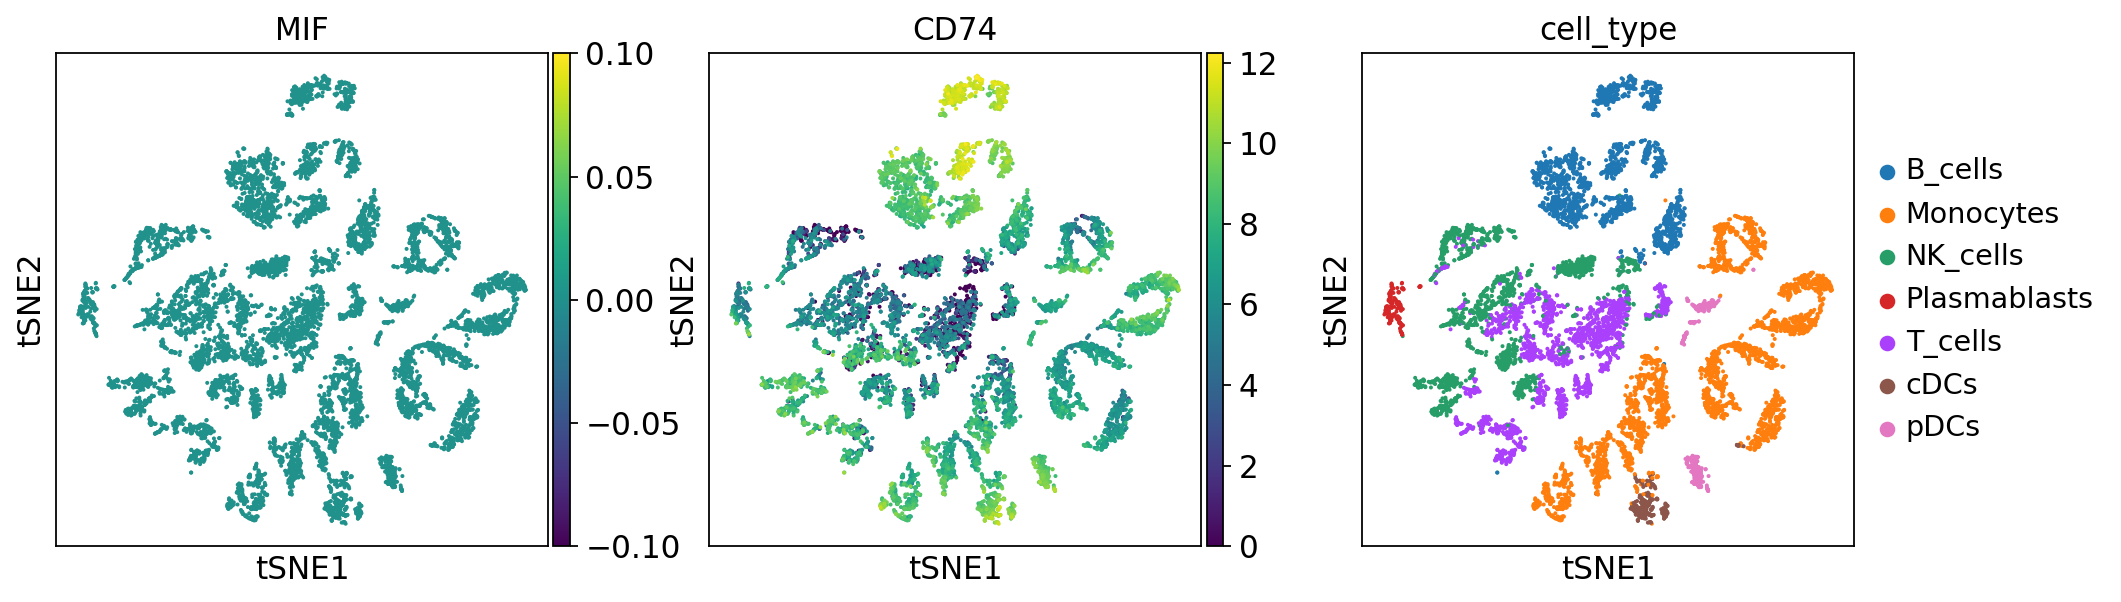

In [15]:
fig = sc.pl.tsne(adata_adults,color=['MIF','CD74','cell_type'],return_fig=True)
fig.savefig('/home/yike/phd/dengue/figures/tsnefigures/adults_MIF_CD74.png')

In [ ]:
sc.pl.tsne(adata_children,color=['MIF','CD74','cell_type'],save='/home/yike/phd/dengue/figures/children_MIF_CD74.png')

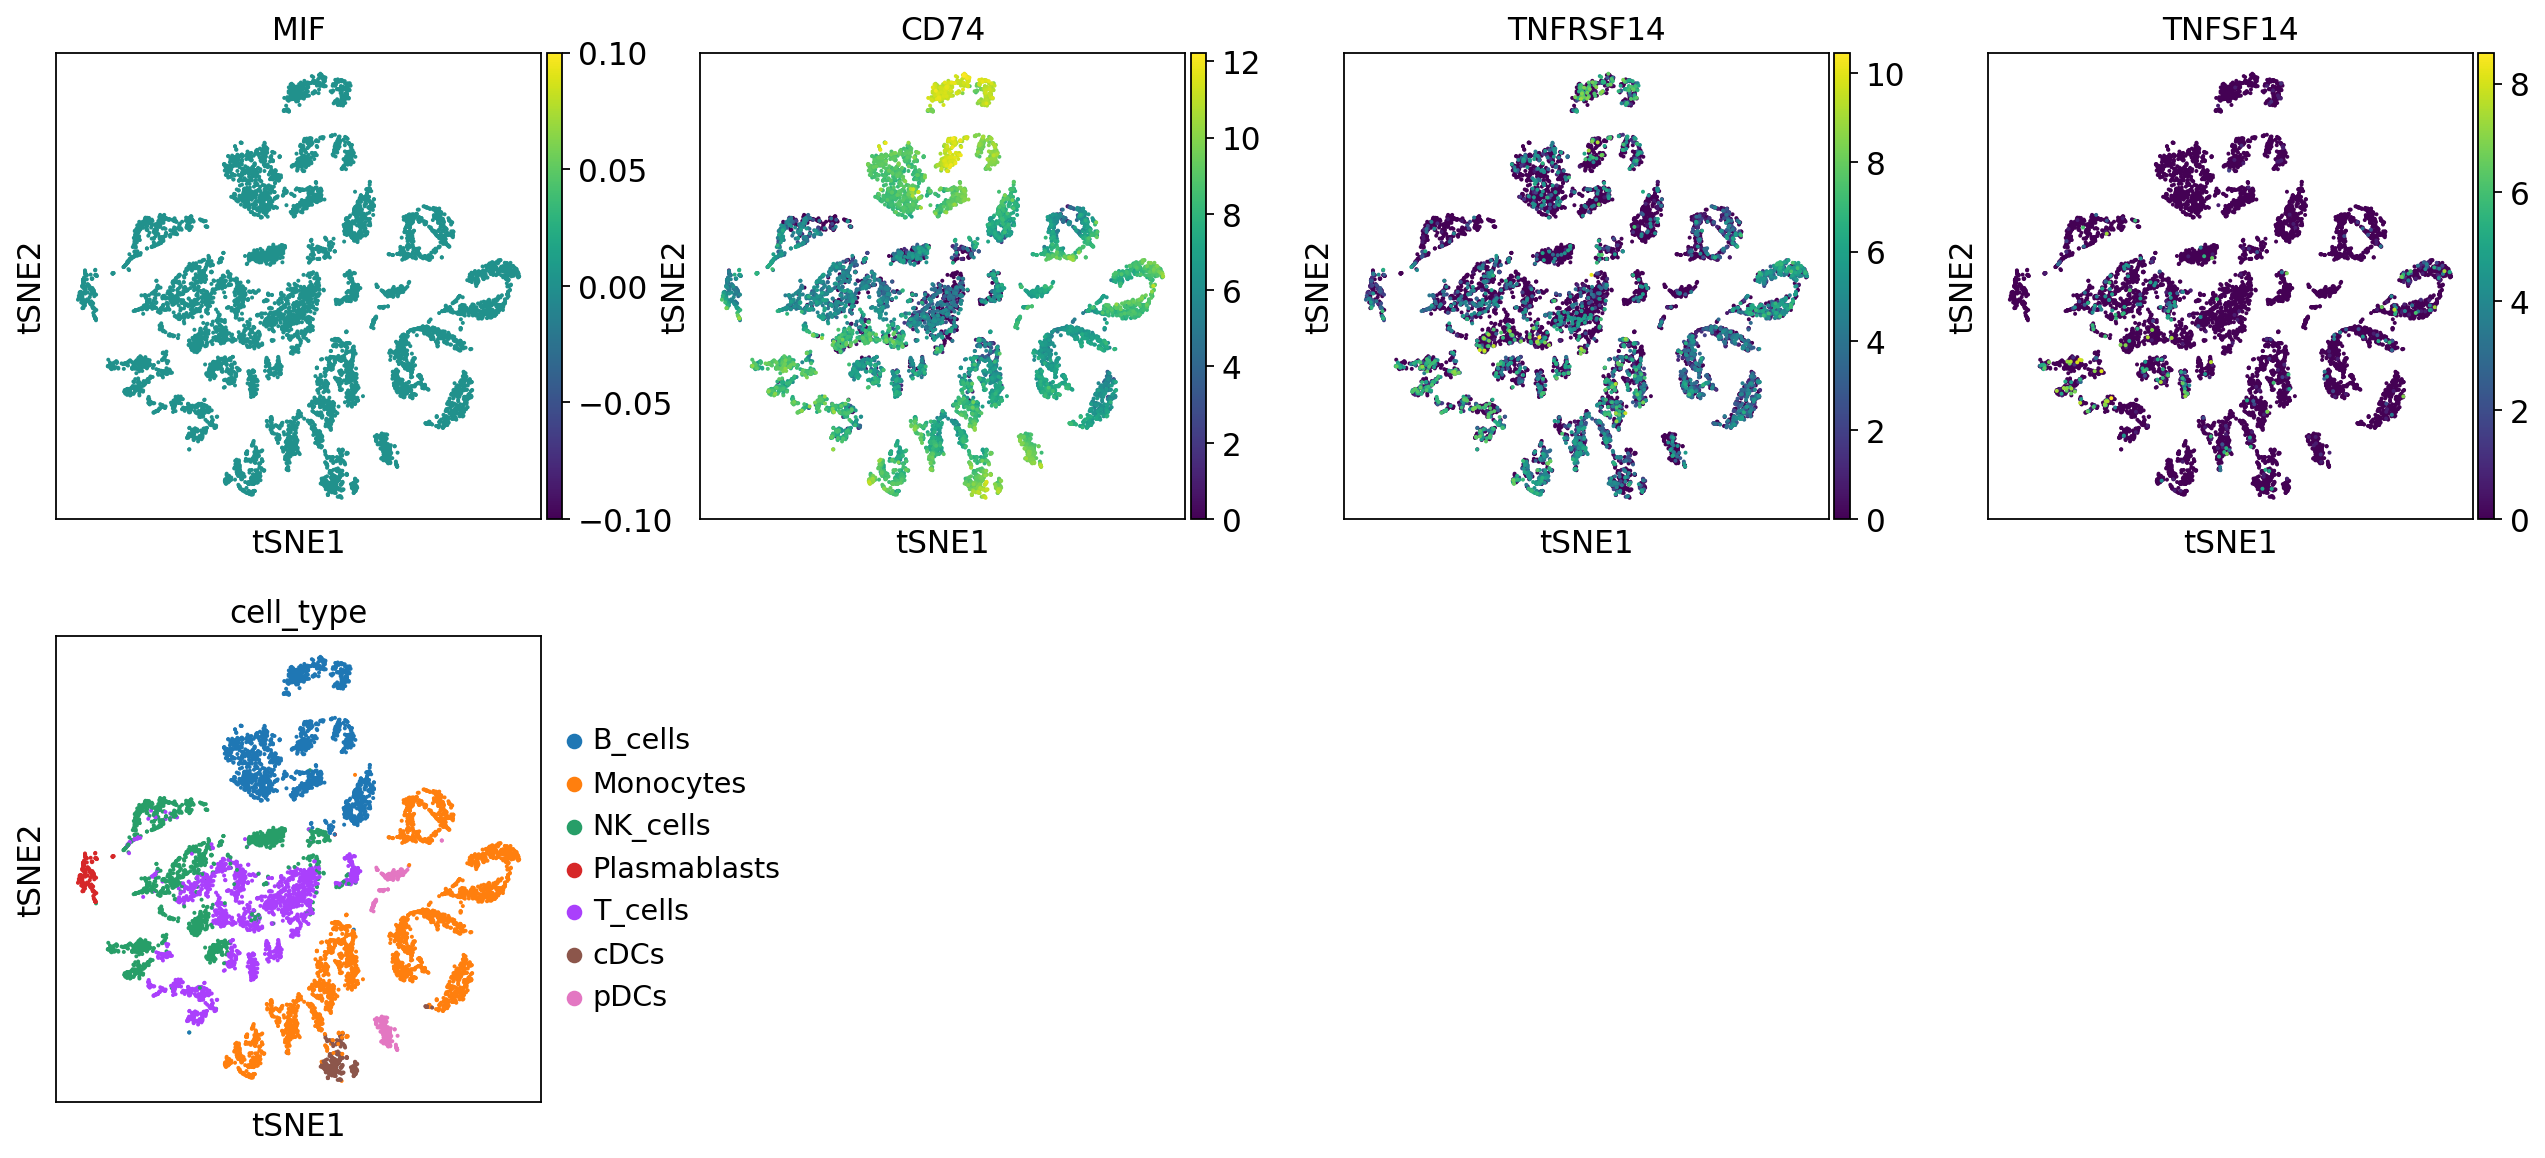

In [11]:
sc.pl.tsne(adata_adults,color=['MIF','CD74','TNFRSF14','TNFSF14','cell_type'])

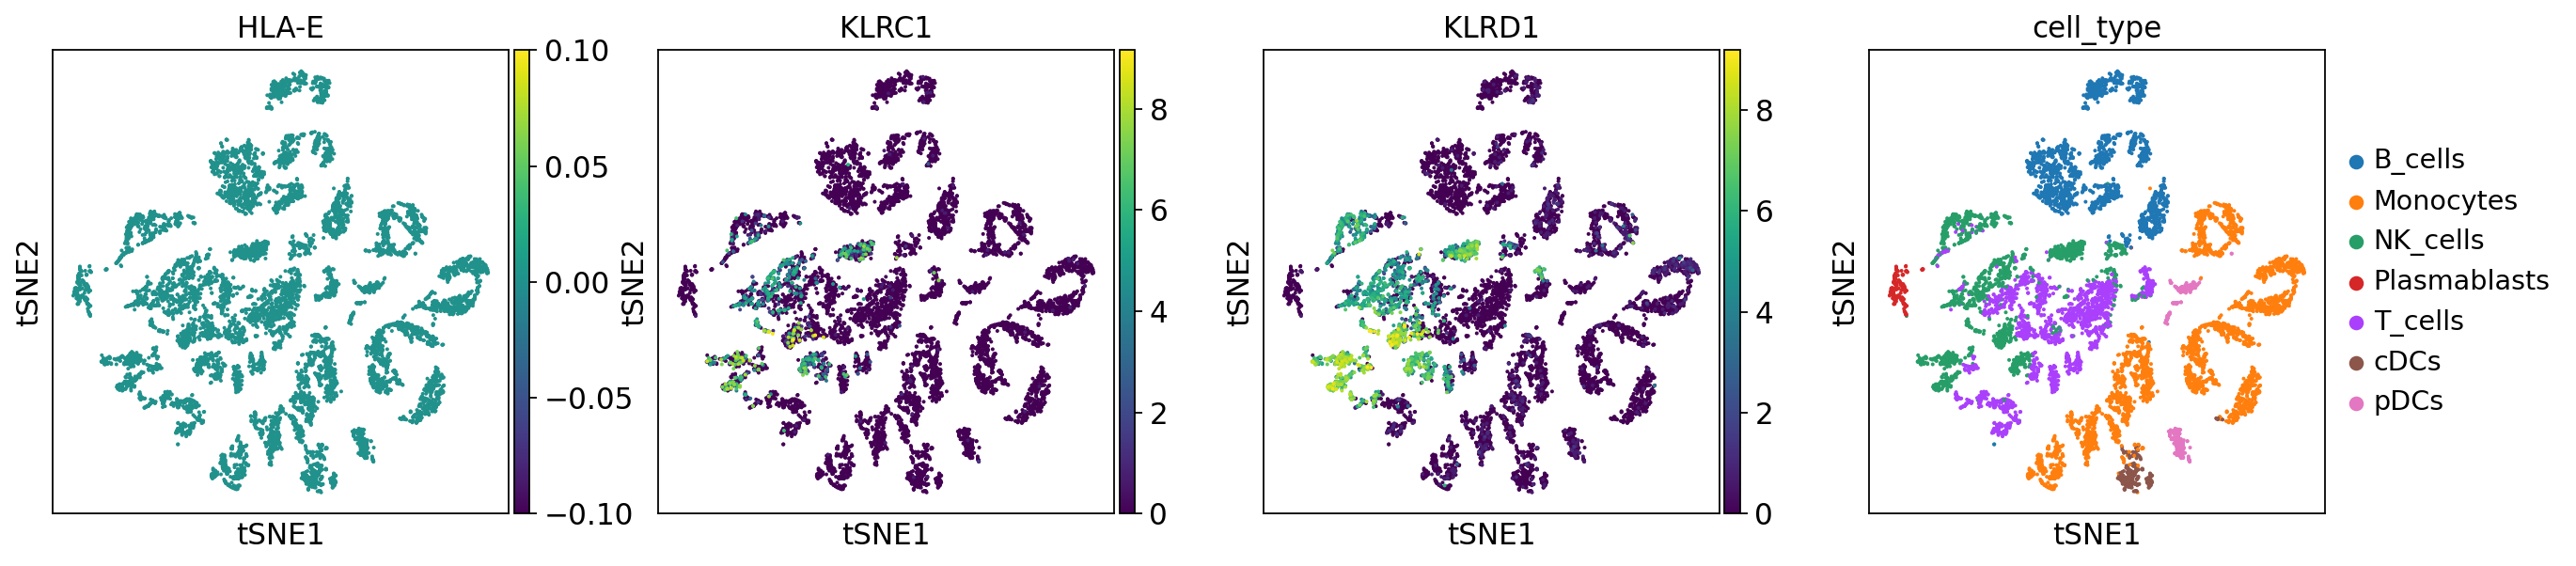

In [12]:
sc.pl.tsne(adata_adults,color=['HLA-E','KLRC1','KLRD1','cell_type'])

In [ ]:
sc.pl.tsne(adata_children,color=['HLA-E','KLRC1','KLRD1','cell_type'])

In [ ]:
def interaction_by_ct_kdeplot(adata, interactions, save=None):
    '''kdeplot of gene expression in interactions, the plots shown as:
    subplots by different cell_types,
    in each subplot: 'density of cells' vs 'gene expression [log10(cpm+0.1)]' in different samples (IDs),
    Args:
        adata: --> the data that want to analyze, eg. adata_sick, adata_healthy
        interactions --> a list containing interaction pairs, eg. [['TNFRSF14', 'BTLA'],['TNFSF13B', 'TNFRSF13B']]
    Returns:
        Return nothing
        will save plots into '/home/yike/phd/dengue/figures/express_by_sick' with the name as gene1+'-'+gene2+'_by_ct_kde.png'
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cell_types = list(adata.obs['cell_type'].astype('category').cat.categories)
    IDs = list(adata.obs['ID'].astype('category').cat.categories)
    n_column = len(cell_types) +1 
    
    colors = sns.color_palette('hls', len(IDs))
    sns.set_palette(colors)

    from collections import defaultdict
    adata_dic = {}
    for cell_type in cell_types:
        adata_ct = adata[adata.obs['cell_type'] == cell_type]
        for ID in IDs:
            adata_dic[(cell_type, ID)] = adata_ct[adata_ct.obs['ID'] == ID]
            adata_dic[('all', ID)] = adata[adata.obs['ID'] == ID]

    for interaction in interactions:
        gene1 = interaction[0]
        gene2 = interaction[1]
        fig, axs = plt.subplots(n_column, 2, figsize = (8, 22), dpi=80, facecolor='white', sharex=True, sharey=True)
        for i in range(n_column):
            for ID in IDs:
                if i == 0: # epression in all samples
                    cell_type = 'all'
                else:      # expression in different samples (IDs)
                    cell_type = cell_types[i-1]
                
                gene1_ct = adata_dic[(cell_type, ID)][:, gene1].X.toarray()[:, 0]
                np_gene1_ct = np.log10(0.1 + gene1_ct)
                sns.kdeplot(np_gene1_ct, bw_method=0.5, ax=axs[i, 0], bw=0.1, label='_nolegend_')
                
                gene2_ct = adata_dic[(cell_type, ID)][:, gene2].X.toarray()[:, 0]
                np_gene2_ct = np.log10(0.1 + gene2_ct)
                if i == 0:
                    sns.kdeplot(np_gene2_ct, bw_method=0.5, ax=axs[i, 1], bw=0.1, label=ID)
                else:
                    sns.kdeplot(np_gene2_ct, bw_method=0.5, ax=axs[i, 1], bw=0.1, label='_nolegend_')
                
                gene1_ct_avg = np.log10(0.1 + np.mean(gene1_ct))
                gene2_ct_avg = np.log10(0.1 + np.mean(gene2_ct))
                sns.scatterplot(x=[gene1_ct_avg], y=[4], ax=axs[i, 0])
                sns.scatterplot(x=[gene2_ct_avg], y=[4], ax=axs[i, 1])
            
            axs[i, 0].set_ylim(0, 5)
            axs[i, 1].set_ylim(0, 5)
            axs[i, 0].tick_params(labelsize=15)
            axs[i, 1].tick_params(labelsize=15)
            axs[i, 0].set_ylabel(None)
            axs[i, 1].set_ylabel(None)
            axs[0, 1].legend(loc='upper right', ncol=2, markerscale=0.1, frameon=False, framealpha=0, fontsize=8, columnspacing=12.5)
            #axs[0, 1].legend(loc='upper left', ncol=2, bbox_to_anchor=(1, 1, 0, 0), bbox_transform=axs[0, 1].transAxes, fontsize=6)
            axs[i, 0].set_title(gene1 + ' in ' + cell_type, fontsize=15)
            axs[i, 1].set_title(gene2 + ' in ' + cell_type, fontsize=15)
        
        fig.text(0, 0.5, 'density of cells', va='center', rotation='vertical', fontsize=20)
        fig.text(0.5, 0, 'gene expression [log10(cpm+0.1)]', ha='center', fontsize=20)
        
        fig.tight_layout(rect=[0.05,0.02,1,1], pad=0, h_pad=0, w_pad=0)
        
        if save is not None:
            fig.savefig(save + gene1 + '-' + gene2 + '_by_ct_kde.png')
        